<a href="https://colab.research.google.com/github/nataliesioo/NLP-text-preprocessing/blob/master/NLP_testpreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 전처리? 

Tokenization 分詞
* 단어/문장 단위로 split함 

Normalization
* 표현 방법 통일화

Cleaning
* 노이즈 제거 

Stemming 斷尾
* 어간(의미 가진 부분)만 추출 

Lemmatization
* 원형으로 전환

Stopword (불용어)
* 의미 없는 단어 제거 (나,너,은,이,가...)

# **어절분리** (Word Tokenize)




In [3]:
import nltk
nltk.download('punkt')  #download corpus 

sentences = "Hello World"
tokens = nltk.word_tokenize(sentences) #分詞
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['Hello', 'World']


# **문장 분리** (Sentence Tokenize)




In [4]:
import nltk
nltk.download ('punkt')

sentence = "My name is Natalie. How old are you?"
sen = nltk.sent_tokenize(sentence) #分sentence 
print(sen)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['My name is Natalie.', 'How old are you?']


# **형태소**
입력: 어절단위로 들어감? (分詞결과 = 입력)

결과: tokenize+pos tag?




In [5]:
import nltk
nltk.download ('averaged_perceptron_tagger')

sen = "my name is apple and i am 100 years old my major is natural language processing"

tokens = nltk.word_tokenize(sen) #tokenize
tagged = nltk.pos_tag(tokens) #pos tag 

print(tagged) 


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('my', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), ('apple', 'NN'), ('and', 'CC'), ('i', 'NN'), ('am', 'VBP'), ('100', 'CD'), ('years', 'NNS'), ('old', 'JJ'), ('my', 'PRP$'), ('major', 'JJ'), ('is', 'VBZ'), ('natural', 'JJ'), ('language', 'NN'), ('processing', 'NN')]


# **개체먕 인식** (Name Entity Recognition) 
* 사람, 조직, 장소, 이름 등 개체를 인식
* Relation Extraction = 개체명 간의 관계 추출 

In [6]:
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')

sen = "Apple is studying at Standford University in California"

tokens = nltk.word_tokenize(sen)
tagged = nltk.pos_tag(tokens)
entities = nltk.chunk.ne_chunk(tagged)

print(entities)

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
(S
  (GPE Apple/NNP)
  is/VBZ
  studying/VBG
  at/IN
  (ORGANIZATION Standford/NNP University/NNP)
  in/IN
  (GPE California/NNP))


# **Edit Distance**
두 글자의 차이 찾는 것

insertion/deletion/substitution

In [11]:
import nltk
from nltk.metrics import edit_distance

print(edit_distance('CAT','HAT'))
print(edit_distance('difficult','different'))



1
4


# **Stemming** (어간 추출)
의미 있는 부분만 추출


In [8]:
import nltk
from nltk.stem import PorterStemmer

pst = PorterStemmer() #객체? 생선

print(pst.stem('computers'))
print(pst.stem('going'))

comput
go


# **Lemmatization**
* 단어의 원형

In [9]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

wlem= WordNetLemmatizer()

print(wlem.lemmatize("ate",pos = 'v'))
print(wlem.lemmatize("done",pos = 'v'))
print(wlem.lemmatize("went",pos = 'v'))
print(wlem.lemmatize("are",pos = 'v'))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
eat
do
go
be


# **Stopword**
* 의미 없는 단어들, 전처리 단계에서 제거해야하는 것들
* nltk에서 이미 정해준 불용어 셋이 있음

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_eng = set(stopwords.words('english')) # 불용어 불러엄
print(stop_eng)

sen = "I want to make some Instagram filters then go out to have a walk"
tokens = nltk.word_tokenize(sen) # 불용어 제거하고 싶은 문장 먼저 토큰화

clean_tokens= []
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop_eng): #소문자 시켜주고, 불용어에 없는 것 출력
    clean_tokens.append(tok)

print("불용어 포함: ", tokens)
print("불용어 미포함: ", clean_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
{'our', "mustn't", 'hers', 'having', 'be', 'to', "didn't", "it's", "couldn't", 'do', 'doesn', 'not', 'own', 'both', 'these', "hadn't", 'isn', "don't", 'is', 'under', 'if', 'an', 'your', 'was', 'can', "isn't", "wouldn't", 'same', 'theirs', 'yours', 'than', "you're", 'o', 'didn', 'y', 'more', 'haven', 'it', 'ain', 'those', 'during', 'been', 'on', 'has', 'myself', "shouldn't", 'him', 'she', 'yourselves', 'were', 'herself', "should've", 'them', 'between', 'where', 'am', 'by', 'had', 'he', "you've", 'mustn', 'did', 'such', 'm', 'after', 'below', 'further', 'which', 'most', "that'll", 'll', 'shouldn', 'nor', 'about', 'over', 'will', 'but', 'no', 'mightn', 'too', 'himself', 'each', 've', "hasn't", 'their', 'whom', 'ours', "doesn't", "mightn't", 'how', 'out', 'won', 'again', 'what', 'few', "wasn't", 'her', 'through', 'his', 'in', 't', 'before', 'any', 'some', 'we', 'so', 'of',

### 명사/동사만 추출

In [0]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

sen = "Barack Hussein Obama II is an American polician who served as the 44th persident of the US from 2009 to 2017"

tokens = nltk.word_tokenize(sen)
tagged = nltk.pos_tag(tokens)


allnoun= []
for word, pos in tagged:
  if pos in ['NN','NNP']: #명사만 담겠다
    allnoun.append(word)
  
print ("형태소 분석 결과:", tagged)
print ("명사만 추출 결과:", allnoun)

allverb=[]
for word, pos in tagged:
  if pos in ['VBZ','VBD']: #동사
    allverb.append(word)

print ("동사만 추출 결과:", allverb)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
형태소 분석 결과: [('Barack', 'NNP'), ('Hussein', 'NNP'), ('Obama', 'NNP'), ('II', 'NNP'), ('is', 'VBZ'), ('an', 'DT'), ('American', 'JJ'), ('polician', 'NN'), ('who', 'WP'), ('served', 'VBD'), ('as', 'IN'), ('the', 'DT'), ('44th', 'CD'), ('persident', 'NN'), ('of', 'IN'), ('the', 'DT'), ('US', 'NNP'), ('from', 'IN'), ('2009', 'CD'), ('to', 'TO'), ('2017', 'CD')]
명사만 추출 결과: ['Barack', 'Hussein', 'Obama', 'II', 'polician', 'persident', 'US']
동사만 추출 결과: ['is', 'served']


# **HTML Crawling + Cleaning + 명사만 추출**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


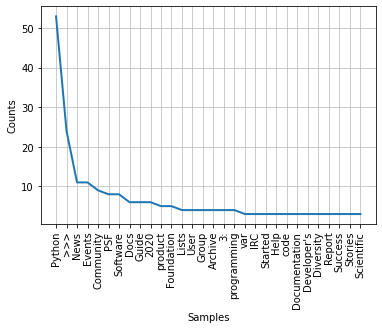

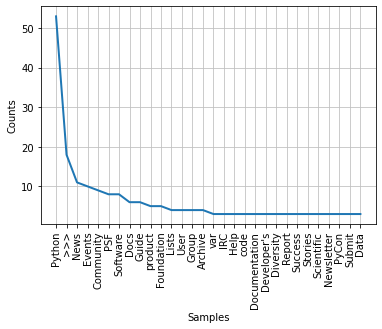

In [0]:
import nltk
import urllib
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import matplotlib
import matplotlib.pyplot as plt
import random

nltk.download('stopwords')

response = urllib.request.urlopen('http://python.org/') # crawling 대상 
html = response.read() # 사이트 정보를 읽어서 html에 저장
clean = BeautifulSoup(html,'html.parser').get_text() # beautifulsoup통한 cleaning

tokens=[]
for tok in clean.split():
  tokens.append(tok)

stop = set(stopwords.words('english')) # 불용어 선언

clean_tokens=[]
for tok in tokens:
  if len(tok.lower())>1 and (tok.lower() not in stop):
    clean_tokens.append(tok)

tagged = nltk.pos_tag(clean_tokens) 

allnoun = []
for word,pos in tagged:
  if pos in ['NN','NNP']:
    allnoun.append(word)

Freq_dist_nltk = nltk.FreqDist(clean_tokens) #빈도 보여줌
Freq_dist_nltk.plot(30, cumulative = False)

Freq_dist_nltk = nltk.FreqDist(allnoun)
Freq_dist_nltk.plot(30, cumulative = False)

# **한국어 형태소 분석**

In [0]:
!pip install konlpy

In [0]:
from konlpy.tag import Okt
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Twitter

kkma = Kkma()
okt = Okt()
komoran = Komoran()
twitter = Twitter()
hannanum = Hannanum()

# kkma만 문장 분리 가능
print ("kkma 문장 분리:", kkma.sentences('네 안녕하세요 반갑습니다.'))



kkma 문장 분리: ['네 안녕하세요', '반갑습니다.']


/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [0]:
#형태소 분석 비교
print ('okt:', okt.morphs(u"집에 가면 감자 좀 쩌줄래?"))
print ('kkma:', kkma.morphs(u"집에 가면 감자 좀 쩌줄래?"))
print ('hannanum:', hannanum.morphs(u"집에 가면 감자 좀 쩌줄래?"))
print ('komoran:', komoran.morphs(u"집에 가면 감자 좀 쩌줄래?"))
print ('twitter:', twitter.morphs(u"집에 가면 감자 좀 쩌줄래?"))

okt: ['집', '에', '가면', '감자', '좀', '쩌줄', '래', '?']
kkma: ['집', '에', '가', '면', '감자', '좀', '쩌줄래', '?']
hannanum: ['집', '에', '가', '면', '감', '자', '좀', '쩌줄래', '?']
komoran: ['집', '에', '가', '면', '감자', '좀', '쩌', '주', 'ㄹ래', '?']
twitter: ['집', '에', '가면', '감자', '좀', '쩌줄', '래', '?']


In [0]:
# pos 비교
print ('okt:', okt.pos(u"집에 가면 감자 좀 쩌줄래?"))
print ('kkma:', kkma.pos(u"집에 가면 감자 좀 쩌줄래?"))
print ('hannanum:', hannanum.pos(u"집에 가면 감자 좀 쩌줄래?"))
print ('komoran:', komoran.pos(u"집에 가면 감자 좀 쩌줄래?"))
print ('twitter:', twitter.pos(u"집에 가면 감자 좀 쩌줄래?"))

okt: [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쩌줄', 'Noun'), ('래', 'Josa'), ('?', 'Punctuation')]
kkma: [('집', 'NNG'), ('에', 'JKM'), ('가', 'VV'), ('면', 'ECE'), ('감자', 'NNG'), ('좀', 'MAG'), ('쩌줄래', 'UN'), ('?', 'SF')]
hannanum: [('집', 'N'), ('에', 'J'), ('가', 'P'), ('면', 'E'), ('감', 'P'), ('자', 'E'), ('좀', 'M'), ('쩌줄래', 'N'), ('?', 'S')]
komoran: [('집', 'NNG'), ('에', 'JKB'), ('가', 'VV'), ('면', 'EC'), ('감자', 'NNP'), ('좀', 'MAG'), ('쩌', 'EF'), ('주', 'VX'), ('ㄹ래', 'EF'), ('?', 'SF')]
twitter: [('집', 'Noun'), ('에', 'Josa'), ('가면', 'Noun'), ('감자', 'Noun'), ('좀', 'Noun'), ('쩌줄', 'Noun'), ('래', 'Josa'), ('?', 'Punctuation')]
